# Plotting Networks

In [1]:
# Import stuff

from matplotlib import pyplot as plt, colors, gridspec
import os, sys, glob, scipy
# from Bio import Entrez
import networkx as nx
import pandas as pd
import numpy as np
# import seaborn as sns

%matplotlib inline
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


/Users/amandae/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
### make graph from list

# fake list of publications:
rri_pubs = [['author1','author9', 'author5'],
            ['author5','author4','author10'],
            ['author8','author5','author2','author6'],
            ['author3','author6','author5','author2'],
            ['author4','author7','author5','author10','author3','author9'],
            ['author3','author4','author5','author7','author12'],
            ['author6','author11','author2','author3','author5'],
            ['author7','author4','author5'],
            ['author8','author3','author2','author6','author5'],
            ['author6','author11','author10','author3','author5'],
            ['author7','author8','author3','author2','author5'],
            ['author3','author8','author5','author4'],
            ['author12','author9','author7','author5'],
            ['author1','author8','author6','author5','author4'],
            ['author5','author4'],
            ['author4','author5','author7','author9'],
            ['author12','author7','author8','author5']]

# these three steps result in a list of all authors, sorted alphabetically
authors = set(x for l in rri_pubs for x in l)
authors = list(authors)
authors = sorted(authors)

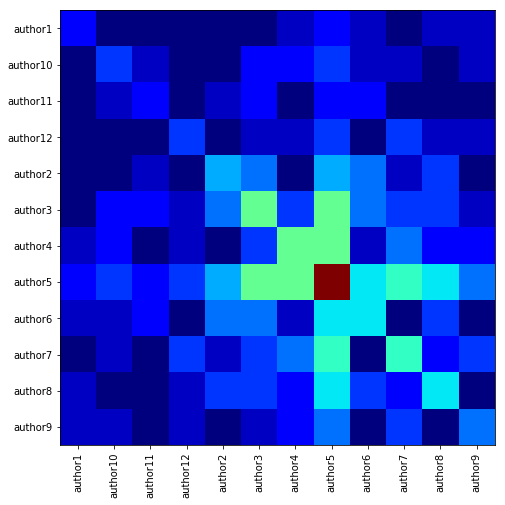

In [3]:
# Make an adjacency matrix showing how many times each author published with every other author.

author_graph = np.zeros([len(authors),len(authors)])

for pub in range(len(rri_pubs)):
    for a1 in range(len(authors)):
        for a2 in range(len(authors)):
            article = rri_pubs[pub]
            if authors[a1] in article and authors[a2] in article:
                author_graph[a1,a2] = author_graph[a1,a2] + 1
                author_graph[a2,a1] = author_graph[a2,a1] + 1
                

# Plot adjacency matrix

fig = figure(figsize(8,8))
ax = subplot(1,1,1)
plt.imshow(author_graph,interpolation='nearest',cmap='jet')
ax.grid(False)
ax.set_xticks(np.linspace(0,len(authors)-1,len(authors)))
ax.set_xticklabels(authors,rotation=90)
ax.set_yticks(np.linspace(0,len(authors)-1,len(authors)))
ax.set_yticklabels(authors)

In [4]:
# Convert adjacency matrix to networkx graph

G = nx.Graph()

for a1 in range(len(author_graph)):
    for a2 in range(len(author_graph)):
        G.add_edge(a1,a2,weight=int(author_graph[a1,a2]))
        
# This should also work (according to a tutorial), but in practice it doesn't :(
# G = nx.convert_matrix.from_numpy_matrix(author_graph.astype(int), create_using = nx.MultiGraph())

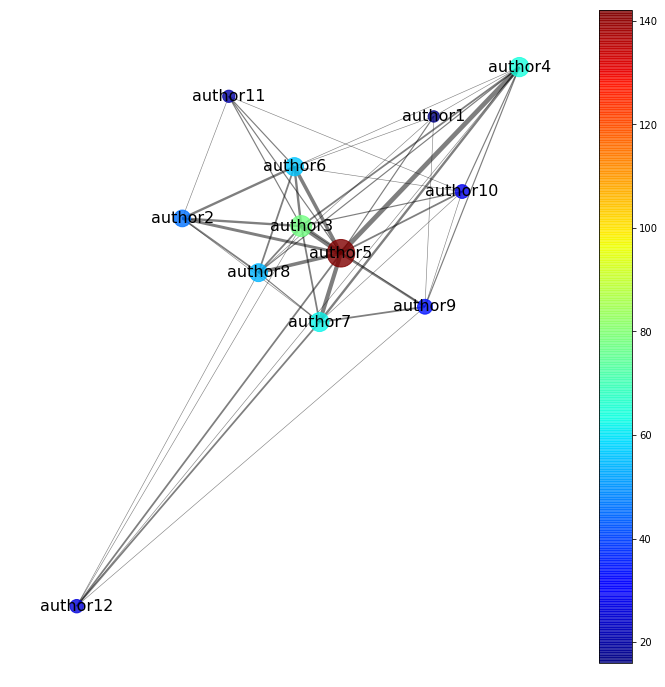

In [5]:
## Plot graph

pos=nx.spring_layout(G) # makes positions for the nodes

fig = figure(figsize(12,12))

# Draw nodes (size and color proportional to node strength)
Gnodes = nx.draw_networkx_nodes(G, pos, 
                       node_color=np.sum(author_graph,axis=0), cmap='jet',
                       node_size=5.0*np.sum(author_graph,axis=0)+50.0*np.ones([1,len(author_graph)]),
                       edge_cmap='jet',
                       alpha=0.8)
plt.colorbar(Gnodes)

# Label nodes with author names
labels = {}
for a in range(len(authors)):
    labels[a] = authors[a]
nx.draw_networkx_labels(G,pos,labels,font_size=16)

# Draw edges (change scaling factor for edge width if necessary)
scaling_factor = 10.0
weights = [G[u][v]['weight'] for u,v in G.edges()]
weights = [float(i) for i in weights]
weights = [i/max(weights)*scaling_factor for i in weights]
nx.draw_networkx_edges(G,pos,width=weights,edge_color='black',alpha=0.5,edge_cmap='jet')

plt.axis('off')
plt.show()

/Users/amandae/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


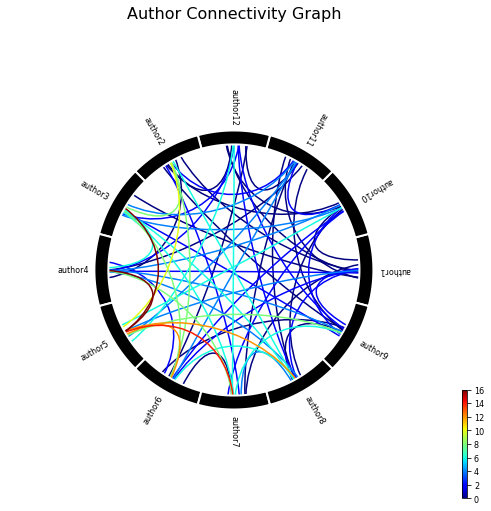

(<matplotlib.figure.Figure at 0x1160a6e50>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x11a047410>)

In [6]:
# plot connectivity circle
from mne.viz import circular_layout, plot_connectivity_circle

fig = figure(figsize=(10,10))

plot_connectivity_circle(author_graph,authors,n_lines=np.size(find(author_graph>0)),
                         fig=fig,title='Author Connectivity Graph',fontsize_title=16,
                         colormap='jet',facecolor='white',textcolor='black',
                         colorbar=1,node_edgecolor='white',node_colors=['black'])

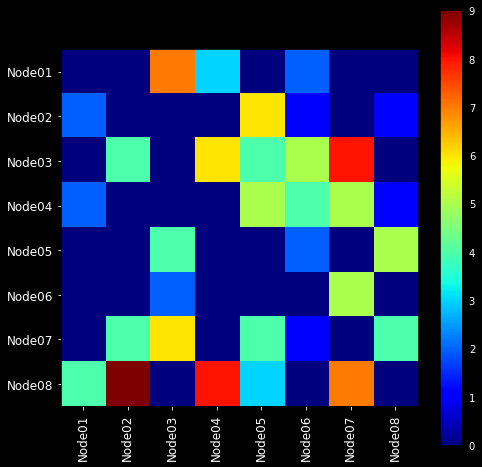

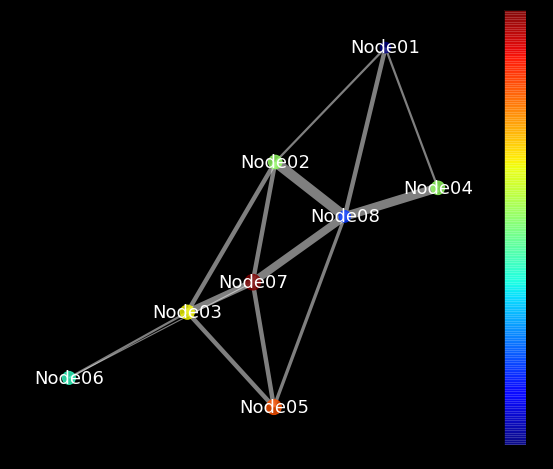

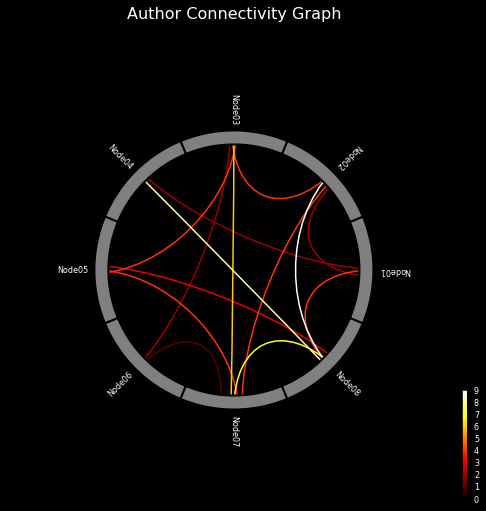

In [7]:
##############################
# Teaching Course

##############################
# Plot 1
mygraph1 = author_graph[2:10,2:10]
mygraph1[0,:] = [0,0,7,3,0,2,0,0]
mygraph1[1,:] = [2,0,0,0,6,1,0,1]
mygraph1[2,:] = [0,4,0,6,4,5,8,0]
mygraph1[3,:] = [2,0,0,0,5,4,5,1]
mygraph1[4,:] = [0,0,4,0,0,2,0,5]
mygraph1[5,:] = [0,0,2,0,0,0,5,0]
mygraph1[6,:] = [0,4,6,0,4,1,0,4]
mygraph1[7,:] = [4,9,0,8,3,0,7,0]
mylabels1 = ['Node01', 'Node02', 'Node03', 'Node04', 'Node05', 'Node06', 'Node07', 'Node08']

fig = figure(figsize(8,8),); fig.patch.set_facecolor('black')
ax = fig.add_subplot(1,1,1)
plt.imshow(mygraph1,interpolation='nearest',cmap='jet')
ax.grid(False)
ax.set_xticks(np.linspace(0,len(mylabels1)-1,len(mylabels1)))
ax.set_xticklabels(mylabels1,rotation=90,fontsize=12)
ax.set_yticks(np.linspace(0,len(mylabels1)-1,len(mylabels1)))
ax.set_yticklabels(mylabels1,fontsize=12)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
color_bar=plt.colorbar()
cbytick_obj = plt.getp(color_bar.ax.axes, 'yticklabels')               
plt.setp(cbytick_obj, color='white')

plt.savefig('gt1.jpg',facecolor=fig.get_facecolor(), edgecolor='none')

##############################
# Plot 2

G = nx.Graph()

for a1 in range(len(mygraph1)):
    for a2 in range(len(mygraph1)):
        G.add_edge(a1,a2,weight=int(mygraph1[a1,a2]))
        

## Plot graph

pos=nx.spring_layout(G) # makes positions for the nodes

fig = figure(figsize(10,8))
fig.patch.set_facecolor('black')

# Draw nodes (size and color proportional to node strength)
Gnodes = nx.draw_networkx_nodes(G, pos, 
                       node_color=np.sum(mygraph1,axis=0), cmap='jet',
                       node_size=8.0*np.sum(mygraph1,axis=0)+50.0*np.ones([1,len(mygraph1)]),
                       edge_cmap='jet',
                       alpha=0.8)
plt.colorbar(Gnodes)

# Labels
labels = {}
for a in range(len(mylabels1)):
    labels[a] = mylabels1[a]
nx.draw_networkx_labels(G,pos,labels,font_size=18,font_color='white')

# Draw edges (change scaling factor for edge width if necessary)
scaling_factor = 10.0
weights = [G[u][v]['weight'] for u,v in G.edges()]
weights = [float(i) for i in weights]
weights = [i/max(weights)*scaling_factor for i in weights]
nx.draw_networkx_edges(G,pos,width=weights,edge_color='white',alpha=0.5,edge_cmap='jet')

plt.axis('off')
plt.savefig('gt2.jpg',facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

##############################
# PLOT 3

from mne.viz import circular_layout, plot_connectivity_circle

fig = figure(figsize=(10,10))
fig.patch.set_facecolor('black')

plot_connectivity_circle(mygraph1,mylabels1,n_lines=np.size(find(mygraph1>0)),fig=fig,
                         title='Author Connectivity Graph',fontsize_title=16,
                         colormap='hot',facecolor='black',textcolor='white',
                         colorbar=1,node_edgecolor='black',node_colors=['grey'])

plt.gcf()
plt.savefig('gt3.png',facecolor='black')
        
        

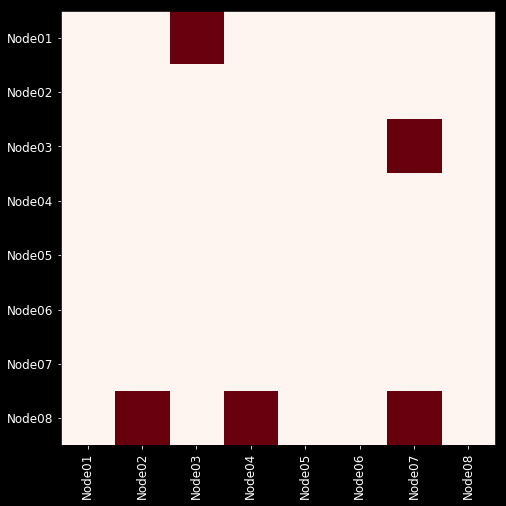

In [8]:
mygraph1 = author_graph[2:10,2:10]
mygraph1[0,:] = [0,0,7,3,0,2,0,0]
mygraph1[1,:] = [2,0,0,0,6,1,0,1]
mygraph1[2,:] = [0,4,0,6,4,5,8,0]
mygraph1[3,:] = [2,0,0,0,5,4,5,1]
mygraph1[4,:] = [0,0,4,0,0,2,0,5]
mygraph1[5,:] = [0,0,2,0,0,0,5,0]
mygraph1[6,:] = [0,4,6,0,4,1,0,4]
mygraph1[7,:] = [4,9,0,8,3,0,7,0]

[inds0,inds1] = np.where(mygraph1 >= 7)
mygraph2 = np.zeros((8,8)); mygraph2[inds0,inds1] = 1

fig = figure(figsize(8,8),); fig.patch.set_facecolor('black')
ax = fig.add_subplot(1,1,1)
plt.imshow(mygraph2,interpolation='nearest',cmap='Reds')
ax.grid(False)
ax.set_xticks(np.linspace(0,len(mylabels1)-1,len(mylabels1)))
ax.set_xticklabels(mylabels1,rotation=90,fontsize=12)
ax.set_yticks(np.linspace(0,len(mylabels1)-1,len(mylabels1)))
ax.set_yticklabels(mylabels1,fontsize=12)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('gt6.jpg',facecolor=fig.get_facecolor(), edgecolor='none')

[ 0.  1.  4.  2.  4.]
[ 0.  2.  6.  6.  4.]


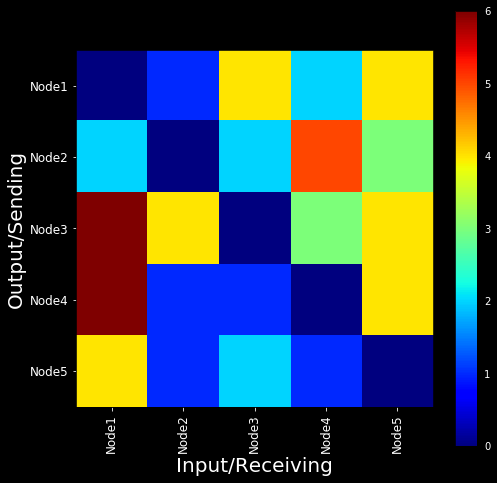

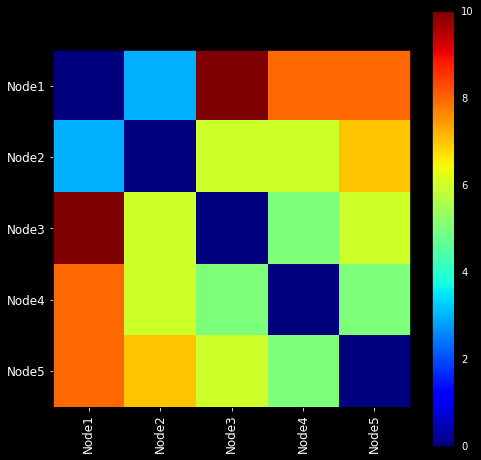

In [106]:
mygraph3 = mygraph1[0:5,0:5]
mylabels2 = mylabels1[0:5]
mygraph3[0,:] = [0,1,4,2,4]
mygraph3[1,:] = [2,0,2,5,3]
mygraph3[2,:] = [6,4,0,3,4]
mygraph3[3,:] = [6,1,1,0,4]
mygraph3[4,:] = [4,1,2,1,0]


fig = figure(figsize(8,8),); fig.patch.set_facecolor('black')
ax = fig.add_subplot(1,1,1)
plt.imshow(mygraph3,interpolation='nearest',cmap='jet')
ax.grid(False)
ax.set_xticks(np.linspace(0,len(mylabels2)-1,len(mylabels2)))
ax.set_xticklabels(mylabels2,rotation=90,fontsize=12)
ax.set_yticks(np.linspace(0,len(mylabels2)-1,len(mylabels2)))
ax.set_yticklabels(mylabels2,fontsize=12)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_xlabel('Input/Receiving',fontsize=20,color='white')
ax.set_ylabel('Output/Sending', fontsize=20,color='white')

color_bar=plt.colorbar()
cbytick_obj = plt.getp(color_bar.ax.axes, 'yticklabels')               
plt.setp(cbytick_obj, color='white')

plt.savefig('gt7.jpg',facecolor=fig.get_facecolor(), edgecolor='none')


deg1_out = np.sum(mygraph3,axis=1)
deg1_in = np.sum(mygraph3,axis=0)
print mygraph3[0,:]
print mygraph3[:,0]
mygraph4 = mygraph3



mygraph3 = mygraph1[0:5,0:5]
mylabels2 = mylabels1[0:5]
mygraph3[0,:] = [0,3,10,8,8]
mygraph3[1,:] = [3,0,6,6,7]
mygraph3[2,:] = [10,6,0,5,6]
mygraph3[3,:] = [8,6,5,0,5]
mygraph3[4,:] = [8,7,6,5,0]


fig = figure(figsize(8,8),); fig.patch.set_facecolor('black')
ax = fig.add_subplot(1,1,1)
plt.imshow(mygraph3,interpolation='nearest',cmap='jet')
ax.grid(False)
ax.set_xticks(np.linspace(0,len(mylabels2)-1,len(mylabels2)))
ax.set_xticklabels(mylabels2,rotation=90,fontsize=12)
ax.set_yticks(np.linspace(0,len(mylabels2)-1,len(mylabels2)))
ax.set_yticklabels(mylabels2,fontsize=12)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

color_bar=plt.colorbar()
cbytick_obj = plt.getp(color_bar.ax.axes, 'yticklabels')               
plt.setp(cbytick_obj, color='white')

plt.savefig('gt8.jpg',facecolor=fig.get_facecolor(), edgecolor='none')

deg1 = np.sum(mygraph3,axis=0)

In [10]:
print deg1, deg1_out, deg1_in

[ 29.  22.  27.  24.  26.] [ 11.  12.  17.  12.   8.] [ 18.   7.   9.  11.  15.]


In [11]:
mygraph3 = mygraph1[0:5,0:5]
mylabels2 = mylabels1[0:5]
mygraph3[0,:] = [0,1,4,2,4]
mygraph3[1,:] = [2,0,2,5,3]
mygraph3[2,:] = [6,4,0,3,4]
mygraph3[3,:] = [6,1,1,0,4]
mygraph3[4,:] = [4,1,2,1,0]
mygraph3[0,:]

array([ 0.,  1.,  4.,  2.,  4.])

/Users/amandae/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


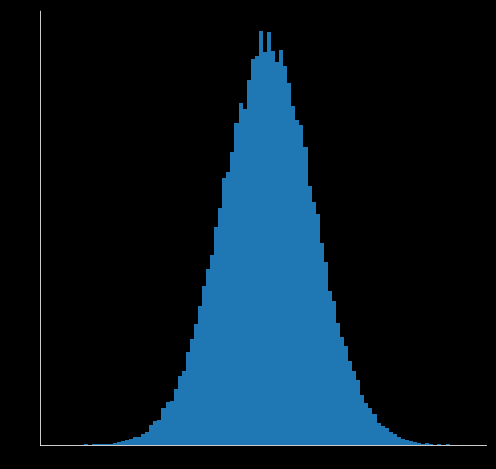

In [12]:
fig = figure(figsize(8,8),); fig.patch.set_facecolor('black')
temp = np.random.normal(0,1,100000)

ax = fig.add_subplot(111)
plt.hist(temp,bins=100)
# plt.axis('off')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_axis_bgcolor('black')
plt.savefig('gt9.jpg',facecolor='black', edgecolor='none')

/Users/amandae/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


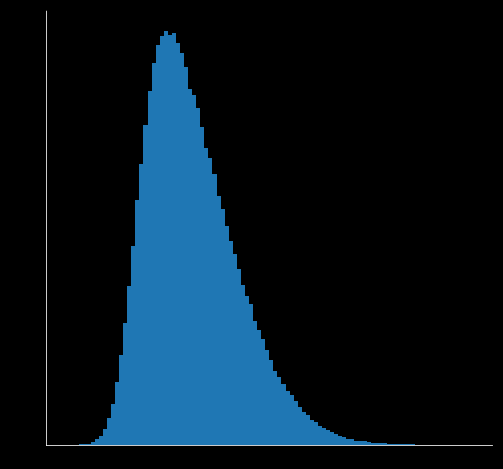

In [14]:
fig = figure(figsize(8,8),); fig.patch.set_facecolor('black')
temp = np.ones((1000,))

ax = fig.add_subplot(111)
plt.hist(p2,bins=100)
# plt.axis('off')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_axis_bgcolor('black')
plt.savefig('gt11.jpg',facecolor='black', edgecolor='none')

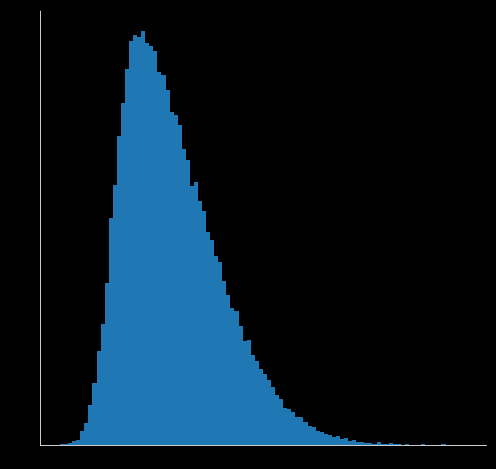

In [15]:


NUM_SAMPLES = 100000
SKEW_PARAMS = [-3, 0]

def rand_skew_norm(fAlpha, fLocation, fScale):
    sigma = fAlpha / np.sqrt(1.0 + fAlpha**2) 

    afRN = np.random.randn(2)
    u0 = afRN[0]
    v = afRN[1]
    u1 = sigma*u0 + np.sqrt(1.0 -sigma**2) * v 

    if u0 >= 0:
        return u1*fScale + fLocation 
    return (-u1)*fScale + fLocation 

def randn_skew(N, skew=0.0):
    return [rand_skew_norm(skew, 0, 1) for x in range(N)]

# lets check they at least visually match the PDF:
#plt.subplots(figsize=(12,4))
p = randn_skew(NUM_SAMPLES, 5)
#sns.distplot(p)
p2 = np.array(p)


fig = figure(figsize(8,8),); fig.patch.set_facecolor('black')
ax = fig.add_subplot(111)
plt.hist(p2,bins=100)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_facecolor('black')
plt.grid('off')
plt.savefig('gt11.jpg',facecolor='black', edgecolor='none')

In [73]:
temp3.shape

AttributeError: 'list' object has no attribute 'shape'

In [103]:
mymat = np.array((0,))
xnew = x[512:]

for i in range(len(xnew)):
    mymat = np.concatenate((mymat,p[i]*np.ones(xnew[i])),axis=0)
    

In [110]:
p2 = np.array(p)
p2.shape

(100000,)

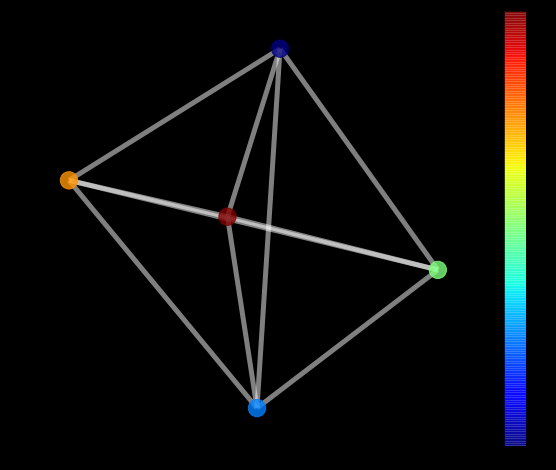

In [103]:
mygraph1 = np.zeros((5,5))
mygraph1[0,:] = [0, 1, 1, 1, 1]
mygraph1[1,:] = [1, 0, 1, 0, 1]
mygraph1[2,:] = [1, 1, 0, 0, 0]
mygraph1[3,:] = [1, 0, 0, 0, 0]
mygraph1[4,:] = [1, 1, 0, 0, 0]

mygraph1 = np.ones((5,5))

mylabels1 = ['Node1', 'Node2', 'Node3', 'Node4', 'Node5']
G = nx.Graph()

for a1 in range(len(mygraph1)):
    for a2 in range(len(mygraph1)):
        G.add_edge(a1,a2,weight=int(mygraph1[a1,a2]))
        

## Plot graph

pos=nx.spring_layout(G) # makes positions for the nodes

fig = figure(figsize(10,8))
fig.patch.set_facecolor('black')

# Draw nodes (size and color proportional to node strength)
Gnodes = nx.draw_networkx_nodes(G, pos, 
                       node_color=[1,2,3,4,5], cmap='jet',
                       node_size=300,
                       edge_cmap='jet',
                       alpha=0.8)

# node_color=np.sum(mygraph1,axis=0)
# node_size=8.0*np.sum(mygraph1,axis=0)+50.0*np.ones([1,len(mygraph1)])
plt.colorbar(Gnodes)

# Labels
labels = {}
for a in range(len(mylabels1)):
    labels[a] = mylabels1[a]
#nx.draw_networkx_labels(G,pos,labels,font_size=18,font_color='white')

# Draw edges (change scaling factor for edge width if necessary)
scaling_factor = 5.0
weights = [G[u][v]['weight'] for u,v in G.edges()]
weights = [float(i) for i in weights]
weights = [i/max(weights)*scaling_factor for i in weights]
nx.draw_networkx_edges(G,pos,width=weights,edge_color='white',alpha=0.5,edge_cmap='jet')

plt.axis('off')
plt.savefig('gt13.jpg',facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()


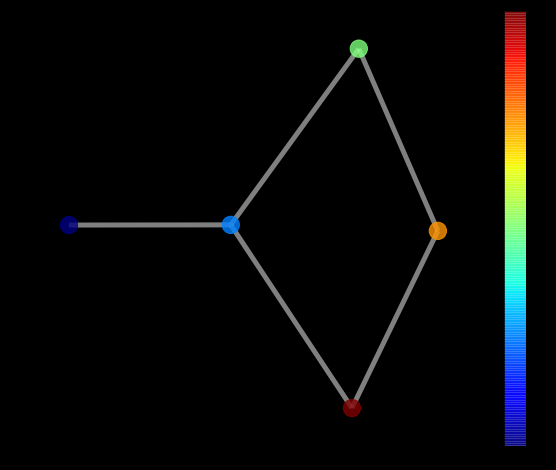

In [80]:
mygraph1 = np.zeros((5,5))
mygraph1[0,:] = [0, 1, 0, 0, 0]
mygraph1[1,:] = [1, 0, 1, 0, 1]
mygraph1[2,:] = [0, 1, 0, 1, 0]
mygraph1[3,:] = [0, 0, 1, 0, 1]
mygraph1[4,:] = [0, 1, 0, 1, 0]

#mygraph1 = np.ones((5,5))

mylabels1 = ['Node1', 'Node2', 'Node3', 'Node4']
G = nx.Graph()

for a1 in range(len(mygraph1)):
    for a2 in range(len(mygraph1)):
        G.add_edge(a1,a2,weight=int(mygraph1[a1,a2]))
        

pos=nx.spring_layout(G) # makes positions for the nodes

fig = figure(figsize(10,8))
fig.patch.set_facecolor('black')

# Draw nodes (size and color proportional to node strength)
Gnodes = nx.draw_networkx_nodes(G, pos, 
                       node_color=[1,2,3,4,5], cmap='jet',
                       node_size=300,
                       edge_cmap='jet',
                       alpha=0.8)
plt.colorbar(Gnodes)

# Labels
labels = {}
for a in range(len(mylabels1)):
    labels[a] = mylabels1[a]
#nx.draw_networkx_labels(G,pos,labels,font_size=18,font_color='white')

# Draw edges (change scaling factor for edge width if necessary)
scaling_factor = 5.0
weights = [G[u][v]['weight'] for u,v in G.edges()]
weights = [float(i) for i in weights]
weights = [i/max(weights)*scaling_factor for i in weights]
nx.draw_networkx_edges(G,pos,width=weights,edge_color='white',alpha=0.5,edge_cmap='jet')

plt.axis('off')
plt.savefig('gt17.jpg',facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()